# Machine Learning 3 

##### Done by: Tu Xiayang 

In this jupyter notebook, we will be doing the **Time series forecasting with ARIMA**. We will only focus on forcasting the number of accidents with time. 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
import itertools
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
# Handle date time conversions between pandas and matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
avidata = pd.read_csv('AviationData.csv', parse_dates=['Event.Date'], index_col=['Event.Date'], low_memory=False)

In [3]:
avidata = avidata[avidata['Country'] == 'United States']
avidata

,Event.Id,Investigation.Type,Accident.Number,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
Event.Date,,,,,,,,,,,,,,,,,,,,,
1948-10-24,20001218X45444,Accident,SEA87LA080,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,Fatal(2),...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1962-07-19,20001218X45447,Accident,LAX94LA336,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,Fatal(4),...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19/9/1996
1974-08-30,20061025X01555,Accident,NYC07LA005,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,Fatal(3),...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26/2/2007
1977-06-19,20001218X45448,Accident,LAX96LA321,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,Fatal(2),...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12/9/2000
1979-02-08,20041105X01764,Accident,CHI79FA064,"Canton, OH",United States,NaN,NaN,NaN,NaN,Fatal(1),...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16/4/1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-20,2.02112E+13,Accident,WPR22LA066,"Phoenix, AZ",United States,033483N,0112836W,NaN,NaN,Non-Fatal,...,Business,RAINBOW RYDERS INC,0.0,0.0,1.0,15.0,NaN,NaN,NaN,NaN
2021-12-21,2.02112E+13,Accident,GAA22WA054,"Auxerre, OF",United States,475047N,0032948W,NaN,NaN,Fatal,...,Unknown,NaN,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2021-12-22,2.02112E+13,Accident,WPR22LA069,"Auburn, CA",United States,NaN,NaN,NaN,NaN,Non-Fatal,...,Positioning,"Fox Two, LLC",0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN


In [4]:
avidata.insert(1, 'Count', 1)
avidata.head()

,Event.Id,Count,Investigation.Type,Accident.Number,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
Event.Date,,,,,,,,,,,,,,,,,,,,,
1948-10-24,20001218X45444,1,Accident,SEA87LA080,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1962-07-19,20001218X45447,1,Accident,LAX94LA336,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19/9/1996
1974-08-30,20061025X01555,1,Accident,NYC07LA005,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26/2/2007
1977-06-19,20001218X45448,1,Accident,LAX96LA321,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12/9/2000
1979-02-08,20041105X01764,1,Accident,CHI79FA064,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16/4/1980


In [5]:
avidata = pd.DataFrame(avidata['Count'])
avidata.head()

,Count
Event.Date,
1948-10-24,1
1962-07-19,1
1974-08-30,1
1977-06-19,1
1979-02-08,1


### Scatterplot of daily data

In [6]:
aviday = avidata.resample('D').sum()
aviday

,Count
Event.Date,
1948-10-24,1
1948-10-25,0
1948-10-26,0
1948-10-27,0
1948-10-28,0
...,...
2021-12-25,0
2021-12-26,1
2021-12-27,0


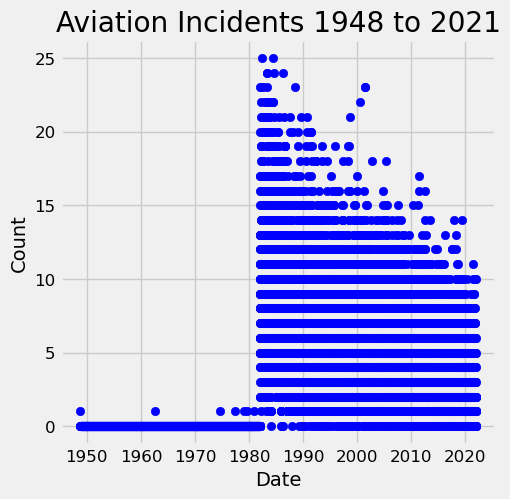

In [7]:
fig, ax = plt.subplots(figsize=(5, 5))

ax.scatter(aviday.index.values, aviday['Count'], color='blue')
ax.set(xlabel="Date", ylabel="Count", title="Aviation Incidents 1948 to 2021")

plt.show()

### Scatterplot of monthly data

In [8]:
avimonth = avidata.resample('M').sum()
avimonth

,Count
Event.Date,
1948-10-31,1
1948-11-30,0
1948-12-31,0
1949-01-31,0
1949-02-28,0
...,...
2021-08-31,90
2021-09-30,123
2021-10-31,98


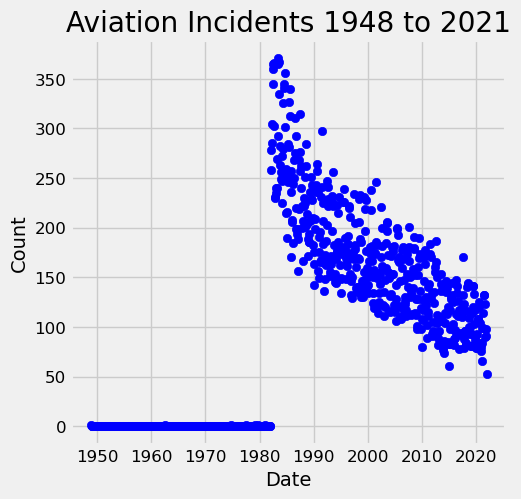

In [9]:
fig, ax = plt.subplots(figsize=(5, 5))

ax.scatter(avimonth.index.values, avimonth['Count'], color='blue')
ax.set(xlabel="Date", ylabel="Count", title="Aviation Incidents 1948 to 2021")

plt.show()

### Scatterplot of yearly data

In [10]:
aviyear = avidata.resample('Y').sum()
aviyear

,Count
Event.Date,
1948-12-31,1
1949-12-31,0
1950-12-31,0
1951-12-31,0
1952-12-31,0
...,...
2017-12-31,1331
2018-12-31,1349
2019-12-31,1303


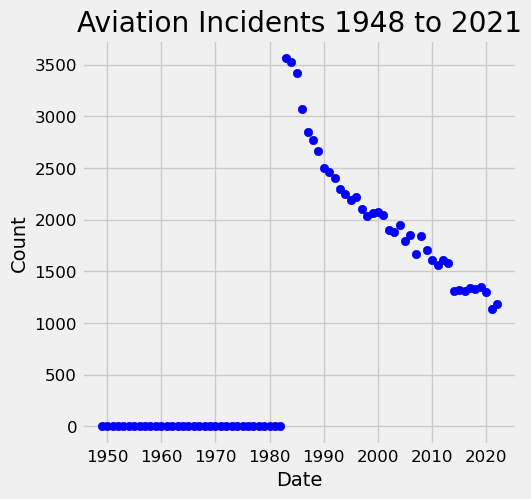

In [11]:
fig, ax = plt.subplots(figsize=(5, 5))

ax.scatter(aviyear.index.values, aviyear['Count'], color='blue')
ax.set(xlabel="Date", ylabel="Count", title="Aviation Incidents 1948 to 2021")

plt.show()

Based on scatterplot, data points before the 1980s are lower than 500. For monthly data, it is less than 10. These data will be considered as outliers and removed for analysis.

### For analysis of monthly data

In [12]:
avimonth = avimonth[avimonth['Count'] > 10] 
avimonth

,Count
Event.Date,
1982-01-31,258
1982-02-28,278
1982-03-31,285
1982-04-30,304
1982-05-31,360
...,...
2021-08-31,90
2021-09-30,123
2021-10-31,98


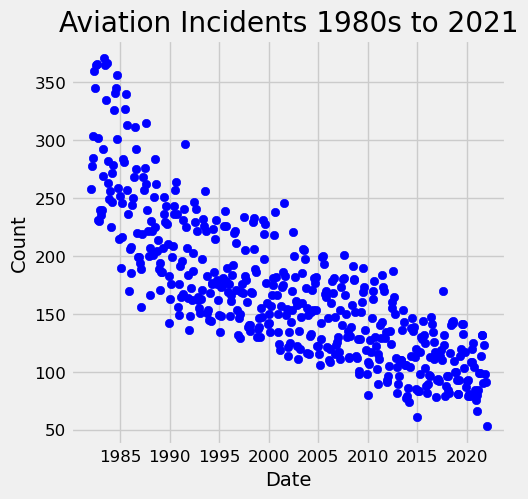

In [13]:
fig, ax = plt.subplots(figsize=(5, 5))

ax.scatter(avimonth.index.values, avimonth['Count'], color='blue')
ax.set(xlabel="Date", ylabel="Count", title="Aviation Incidents 1980s to 2021")

plt.show()

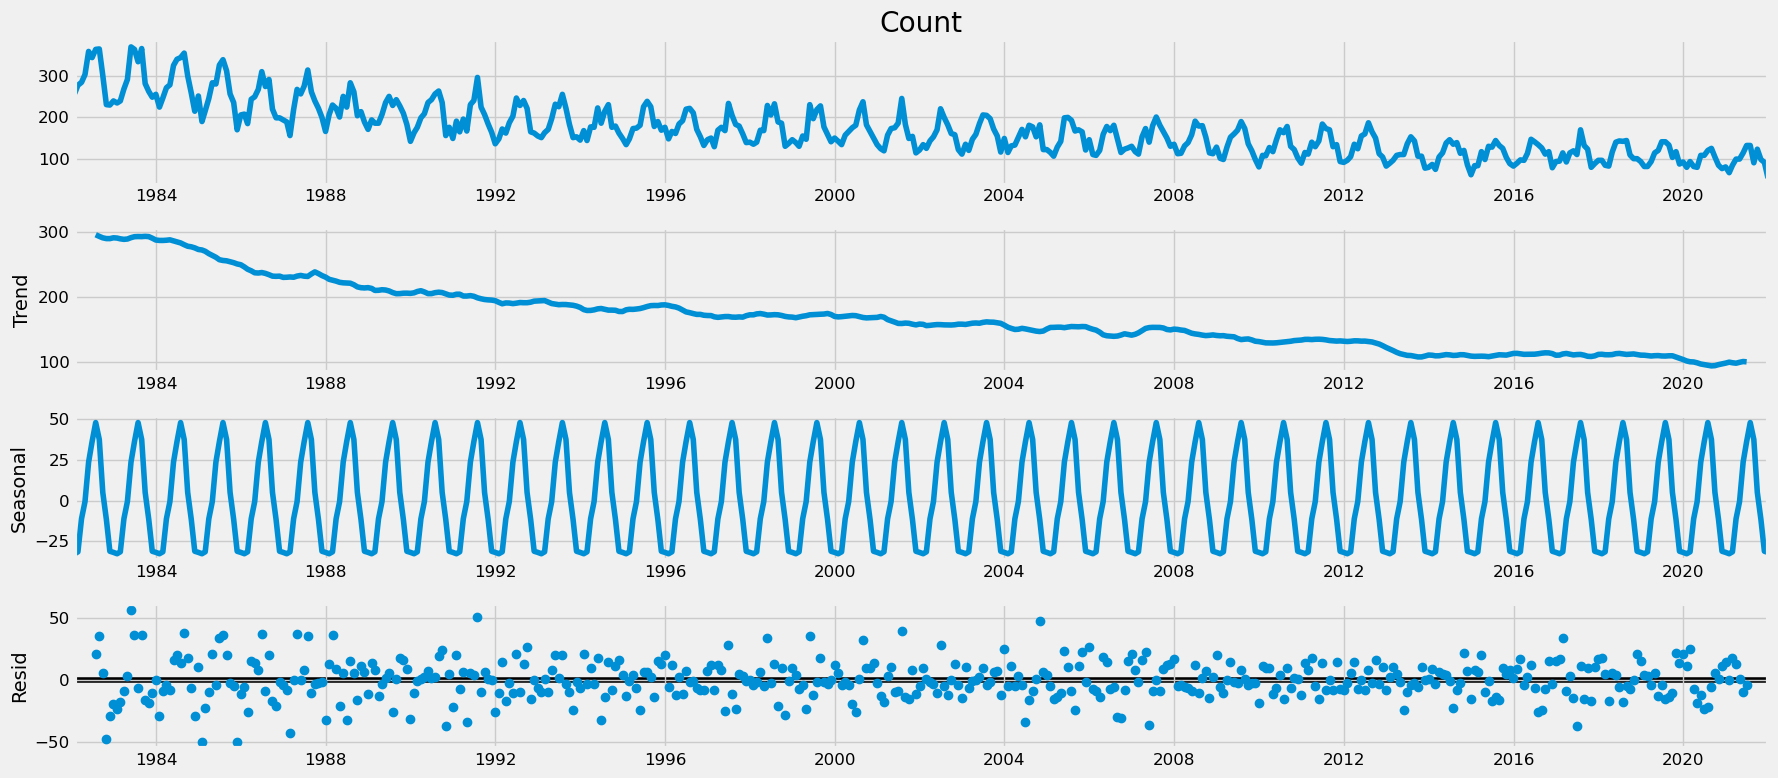

In [14]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(avimonth['Count'], model='additive')
fig = decomposition.plot()
plt.show()

## Time series forecasting with ARIMA
Applying Autoregressive Integrated Moving Average (ARIMA), a commonly used method for time-series forecasting.

ARIMA models are denoted with the notation ARIMA(p, d, q). These three parameters account for seasonality, trend, and noise in data.

In [15]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [16]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(avimonth,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()
                
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:6334.285461388379
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:5633.687275989317
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:4200.682838913965
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:4047.451091204947
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:4160.565987435542
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:4014.5243685383252
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:4055.3397817102395
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:4047.629451067605
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:5774.64419258706
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:5209.514184818989
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:4184.455886045653
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:4019.3485692066224
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:4160.015765802959
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:3995.523811847826
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:4042.170237984426
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:4020.838641796136
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:4495.134537838736
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:4317.0212560023565
ARIMA(0

## Chosen Model
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:3883.3612651419617 which has the lowest Akaike's Information Criterion (AIC) is chosen.

In [17]:
mod = sm.tsa.statespace.SARIMAX(avimonth,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0393      0.052      0.759      0.448      -0.062       0.141
ma.L1         -0.9589      0.016    -59.325      0.000      -0.991      -0.927
ar.S.L12      -0.4399      0.041    -10.845      0.000      -0.519      -0.360
sigma2       356.0196     19.670     18.100      0.000     317.467     394.572


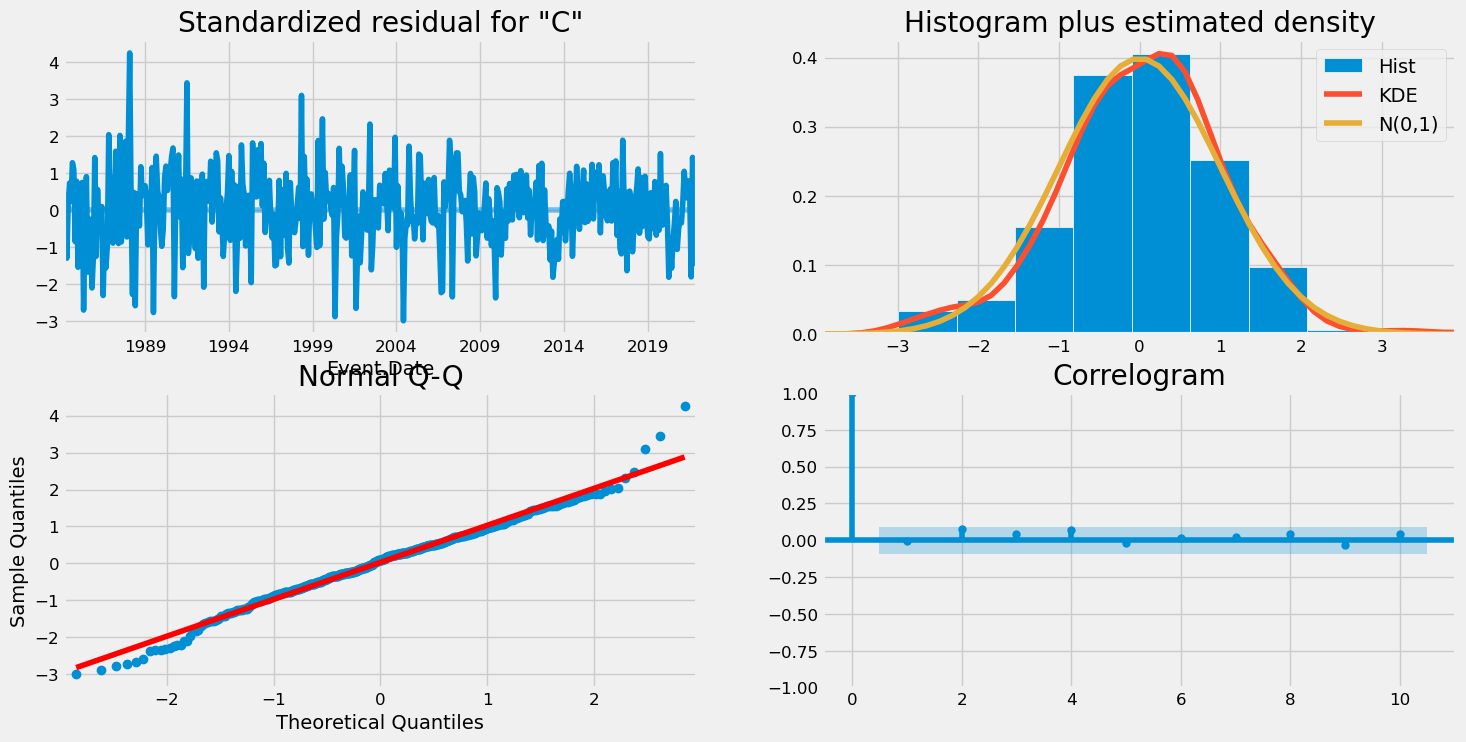

In [18]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

Model Diaagnosis shows a nearly normal distribution.

## Validating forecasts
Comparing predicted and real count

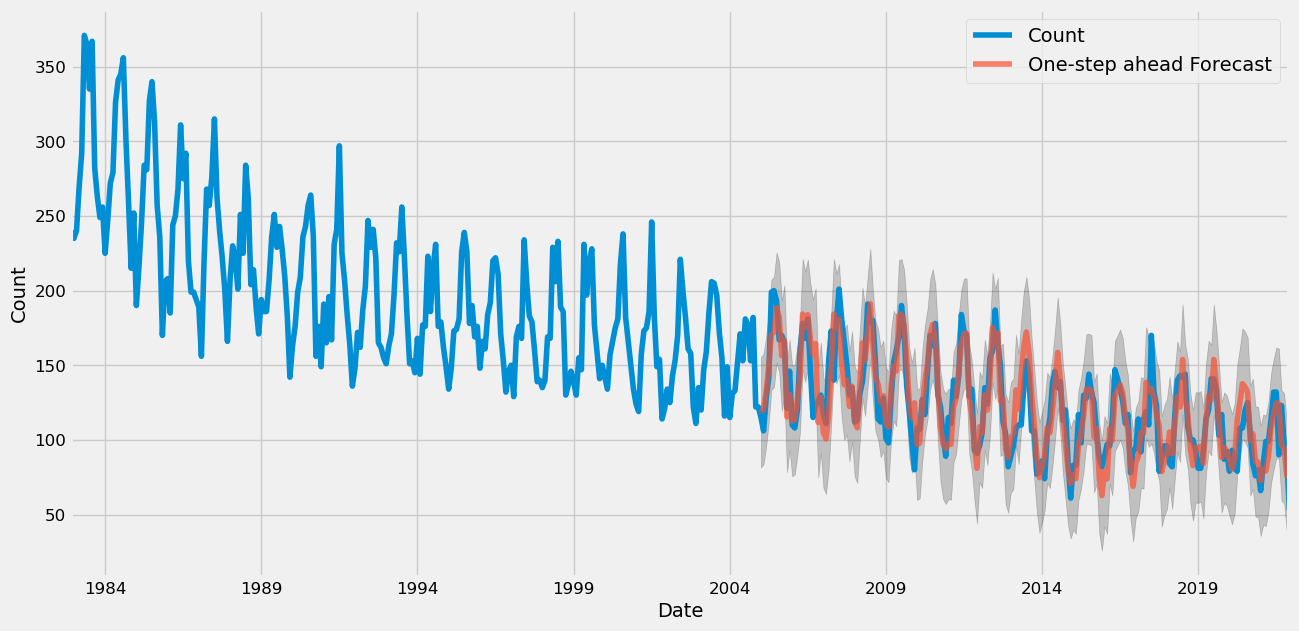

In [19]:
pred = results.get_prediction(start=pd.to_datetime('2005-01-31'), dynamic=False)
pred_ci = pred.conf_int()
ax = avimonth['1982-12-31':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast',
                         alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Count')
plt.legend()
plt.show()

## Producing and visualizing forecasts

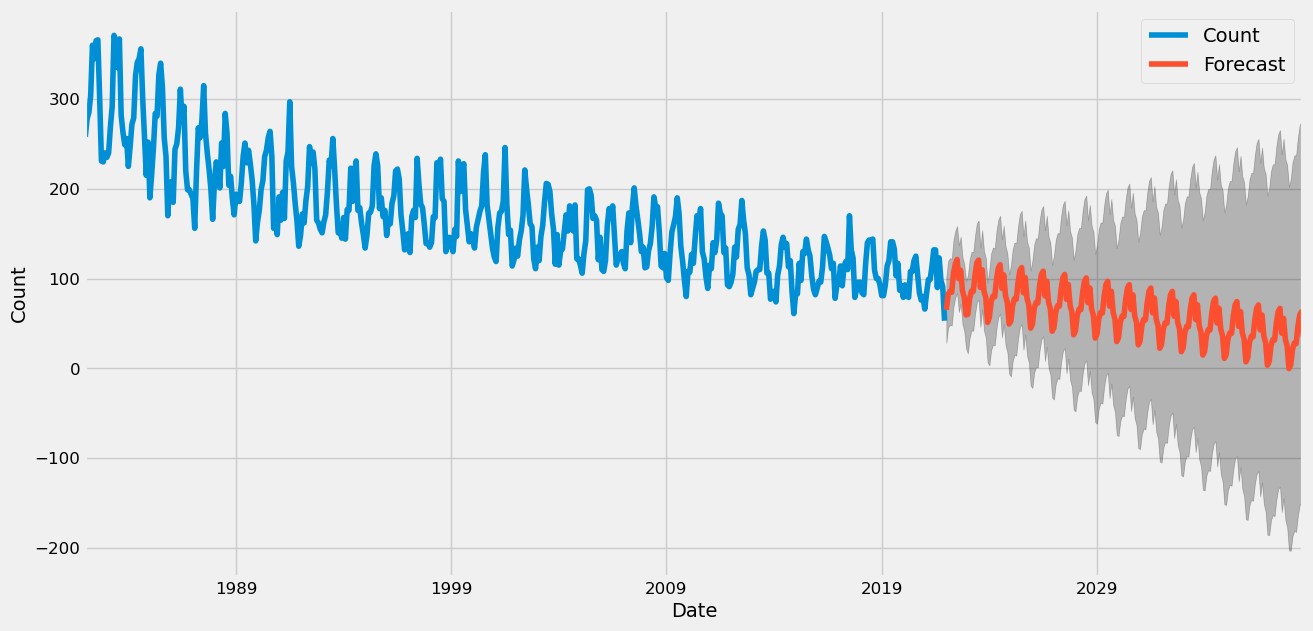

In [20]:
pred_uc = results.get_forecast(steps=200)
pred_ci = pred_uc.conf_int()
ax = avimonth.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Count')
plt.legend()
plt.show()